## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
#1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>

import numpy as np
#2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>

import matplotlib.pyplot as plt
#3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

import sklearn
#4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
#    - <https://scikit-learn.org/stable/user_guide.html>

## 데이터를 확인합니다.

In [2]:
pd.set_option('display.max_columns', None)
# pandas dataframe의 모든 열을 출력하기 위한 설정입니다.

df = pd.read_csv('tox21_train.csv')
# 이 주피터파일과 같은 디렉터리에 존재하는 'tox21_train.csv' 파일을 읽어와 df에 저장합니다.


df
# 데이터프레임을 출력합니다.
#   주피터 노트북에서는 print() 함수를 사용하지 않아도 마지막 열에 입력된 행을 출력합니다.

,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

0번째 열부터 165번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.
    - 반응변수 = 종속변수

## 데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

In [3]:
X = df.iloc[:, :-1]
# 독립 변수를 X에 저장합니다. 독립 변수는 'NR-AR' 열을 제외한 나머지 열입니다.

y = df.iloc[:, -1]
# 종속 변수를 y에 저장합니다. 종속 변수는 'NR-AR' 열입니다.

## 모델을 생성합니다.

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier 모델을 불러옵니다.

# Gradient Boosting Classifier 모델을 생성합니다.
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
# gradient boosting classifier 모델을 생성하고, 모델을 model에 저장합니다.
#   n_estimators: 생성할 트리의 개수입니다.
#   learning_rate: 각 트리의 기여도를 조절하는 파라미터입니다.
#   max_depth: 트리의 최대 깊이입니다.
#   random_state: 랜덤 시드입니다.
model.fit(X, y)
# Gradient Boosting Classifier 모델을 학습합니다.

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)



생성한 모델은 gradient boosting classifier입니다.
- gradient boosting classifier은 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법입니다. random forest와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다. 기본적으로 그래디언트 부스팅은 무작위성이 없으며, 강력한 사전 가지치기가 사용됩니다. 대신 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠릅니다. 그래디언트 부스팅 결정 트리는 전처리가 거의 필요 없으며, 특성의 스케일도 조정할 필요가 없습니다. 이 모델은 특성의 중요도를 제공하므로 특성 선택이 자동으로 이루어집니다.

## gradient boosting classifier은 아래의 하이퍼파라미터를 조정할 수 있습니다.

### 목적함수
$$
L(F) = \sum_{i=1}^{n} L(y_i, F(x_i))
$$
- gradient boosting classifier는 목적함수를 최소화하는 방향으로 학습을 진행합니다.

1. n_estimators : 트리의 개수
2. learning_rate : 학습률
3. max_depth : 트리의 최대 깊이
4. random_state : 랜덤 시드

- 위의 하이퍼파라미터들은 모두 과적합을 방지하기 위한 하이퍼파라미터들입니다. 자세한 내용은 아래의 링크를 참조하세요.
  - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

## gradient boosting classifier의 시각화

gradient boosting classifier의 개별 트리를 시각화하는 것은 가능하지만, 이는 모델 전체를 이해하는 데 큰 도움이 되지 않을 수 있습니다. 왜냐하면 GBM은 일반적으로 수십, 수백, 수천 개의 트리를 학습시키며, 각 트리는 이전 트리의 오차를 보완하는 역할을 하기 때문입니다.
그러나 gradient boosting classifier에서는 특성 중요도(Feature Importance)를 계산하고 시각화하는 것이 가능합니다. 특성 중요도는 각 특성이 모델의 예측에 얼마나 중요한 역할을 하는지를 나타내는 지표입니다. 이를 시각화하면 모델의 예측이 어떤 특성에 의해 주로 영향을 받는지를 파악하는 데 도움이 됩니다.

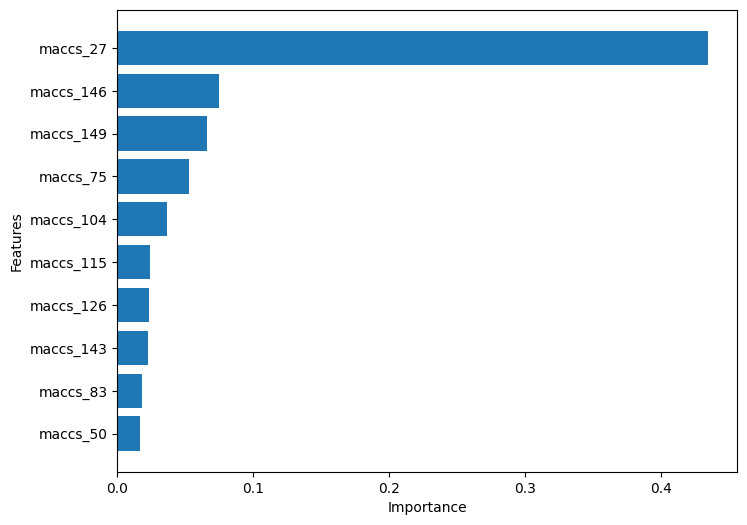

In [5]:
# 중요도 순으로 정렬
importances = pd.Series(data=model.feature_importances_, index=X.columns)
# 모델의 특성 중요도를 importances에 저장합니다.
importances_sorted = importances.sort_values()
# importances를 중요도 순으로 정렬합니다.

# 상위 10개 특성만 선택
importances_top10 = importances_sorted[-10:]
# 중요도가 높은 상위 10개의 특성을 importances_top10에 저장합니다.

plt.figure(figsize=(8, 6))
# 그래프의 크기를 설정합니다.
plt.barh(importances_top10.index, importances_top10.values)
# 가로 막대 그래프를 그립니다.
plt.xlabel('Importance')
# x축의 라벨을 설정합니다.
plt.ylabel('Features')
# y축의 라벨을 설정합니다.
plt.show()
# 그래프를 출력합니다.

## 결정 경계 시각화

아래는 PCA를 사용하여 피처를 2개로 줄인 후 gradient boosting classifier를 학습한 결과입니다. 결정 경계가 다소 복잡하게 나타납니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다.

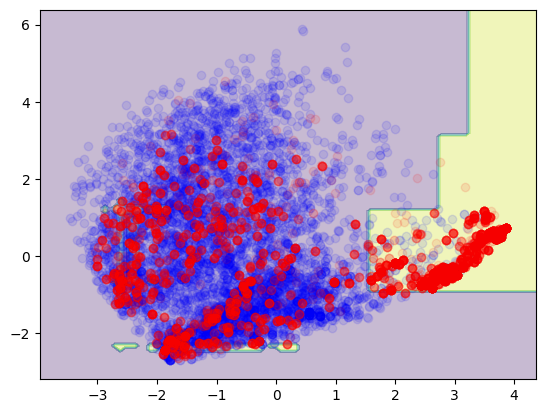

array([[5196,  369],
       [1816, 3749]])

In [6]:
from sklearn.decomposition import PCA
# PCA 모델을 불러옵니다.
from sklearn.metrics import confusion_matrix
# confusion matrix를 불러옵니다.



# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
# PCA 모델을 생성하고, 모델을 pca에 저장합니다.
X_pca = pca.fit_transform(X)
# PCA를 사용하여 피처를 2개로 줄입니다.



# 결정 트리 모델 학습
model_pca = GradientBoostingClassifier(max_depth=3, random_state=42)
# Gradient Boosting Classifier 모델을 생성하고, 모델을 model_pca에 저장합니다.
model_pca.fit(X_pca, y)
# Gradient Boosting Classifier 모델을 학습합니다.



# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열
y_pred = model_pca.predict(X_new).reshape(x1.shape)
# y_pred: X_new를 사용하여 예측한 후, x1의 모양으로 변환한 배열



plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.1)
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.1)
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.show()
# 시각화를 출력합니다.


confusion_matrix(y, model_pca.predict(X_pca))
# confusion matrix를 출력합니다.

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.

In [7]:
# 테스트 데이터를 학습한 모델로 분류한 결과를 혼동 행렬로 나타냅니다. 


df_test = pd.read_csv('tox21_test.csv')
# 이 주피터파일과 같은 디렉터리에 존재하는 'tox21_test.csv' 파일을 읽어와 df에 저장합니다.
X_test = df_test.iloc[:, :-1]
# 독립 변수를 X에 저장합니다. 독립 변수는 'NR-AR' 열을 제외한 나머지 열입니다.
y_test = df_test.iloc[:, -1]
# 종속 변수를 y에 저장합니다. 종속 변수는 'NR-AR' 열입니다.




# 혼동 행렬
from sklearn.metrics import confusion_matrix
# 혼동 행렬을 계산하기 위한 라이브러리를 불러옵니다.

confusion_matrix(y_test, model.predict(X_test))
# 테스트 데이터의 혼동 행렬을 출력합니다.

array([[1207,  184],
       [  31,   31]])


- 1207개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 184개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 31개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 31개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)